In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re  # Для очистки названий файлов

In [2]:
# Подготовим каталог для сохранения графиков
results_folder = './results/fig/after_burning'
os.makedirs(results_folder, exist_ok=True)

In [3]:
# Загрузим экспериментальные данные полученные после прожига
exp_df = pd.read_csv('./csv/exp_14_after_burning_sensor_data_20250802_140557.csv', sep=',')

In [4]:
exp_df

,Timestamp,Relative_Time,LVT-F_raw (psi),LVT-F_processed (psi),LVT-L_raw (psi),LVT-L_processed (psi),PT_M02_raw (psi),PT_M02_processed (psi),PT_F01_raw (psi),PT_F01_processed (psi),...,Valve_PV-P01 (G 17)_state,Button_F1 load_clicked,Button_F1 Fire_clicked,Button_F2 load_clicked,Button_F3 Fire_clicked,Button_F3 load_clicked,Button_F Unload_clicked,Button_F2 Fire_clicked,Button_LED start_clicked,Button_LED stop_clicked
0,2025-08-02 14:05:57.474,3976.781,2.326875,0.33,2.070625,0.33,2.858000,0.916,2.5145,2.903,...,0,0,0,0,0,0,0,0,0,0
1,2025-08-02 14:05:57.476,3976.783,2.326875,0.33,2.070625,0.33,2.858000,0.916,2.5145,2.903,...,0,0,0,0,0,0,0,0,0,0
2,2025-08-02 14:05:57.476,3976.783,2.326875,0.33,2.070625,0.33,2.858000,0.916,2.5145,2.903,...,0,0,0,0,0,0,0,0,0,0
3,2025-08-02 14:05:57.477,3976.784,2.326875,0.33,2.070625,0.33,2.858000,0.916,2.5145,2.903,...,0,0,0,0,0,0,0,0,0,0
4,2025-08-02 14:05:57.478,3976.785,2.326875,0.33,2.070625,0.33,2.858000,0.916,2.5145,2.903,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138250,2025-08-02 14:16:01.246,4580.553,2.342000,0.33,2.889625,0.00,2.850375,0.903,2.6955,3.222,...,0,0,0,0,0,0,0,0,0,0
138251,2025-08-02 14:16:01.246,4580.553,2.342000,0.33,2.889625,0.00,2.850375,0.903,2.6955,3.222,...,0,0,0,0,0,0,0,0,0,0
138252,2025-08-02 14:16:01.247,4580.554,2.342000,0.33,2.889625,0.00,2.850375,0.903,2.6955,3.222,...,0,0,0,0,0,0,0,0,0,0
138253,2025-08-02 14:16:01.247,4580.554,2.342000,0.33,2.889625,0.00,2.850375,0.903,2.6955,3.222,...,0,0,0,0,0,0,0,0,0,0


In [5]:
# Посмотрим все колонки датафрейма
exp_df.columns.tolist()

['Timestamp',
 'Relative_Time',
 'LVT-F_raw (psi)',
 'LVT-F_processed (psi)',
 'LVT-L_raw (psi)',
 'LVT-L_processed (psi)',
 'PT_M02_raw (psi)',
 'PT_M02_processed (psi)',
 'PT_F01_raw (psi)',
 'PT_F01_processed (psi)',
 'PT_F03_raw (psi)',
 'PT_F03_processed (psi)',
 'PT_F02_raw (°C)',
 'PT_F02_processed (°C)',
 'PT_M01_raw (psi)',
 'PT_M01_processed (psi)',
 'PT_L01_raw (°C)',
 'PT_L01_processed (°C)',
 'PT_L03_raw (°C)',
 'PT_L03_processed (°C)',
 'T_0_raw (°C)',
 'T_0_processed (°C)',
 'T_1_raw (°C)',
 'T_1_processed (°C)',
 'T_2_raw (°C)',
 'T_2_processed (°C)',
 'T_3_raw (°C)',
 'T_3_processed (°C)',
 'TYAGA_raw (kg)',
 'TYAGA_processed (kg)',
 'TYAGA2_raw (kg)',
 'TYAGA2_processed (kg)',
 'CR-03_raw (kg)',
 'CR-03_processed (kg)',
 'CR-02-n_raw (kg)',
 'CR-02-n_processed (kg)',
 'CR-02_raw (kg)',
 'CR-02_processed (kg)',
 'CR-01_raw (kg)',
 'CR-01_processed (kg)',
 'S1_raw (s)',
 'S1_processed (s)',
 'S2_raw (s)',
 'S2_processed (s)',
 'S3_raw (s)',
 'S3_processed (s)',
 'S4_raw

In [6]:
# Словарь для отображения названий колонок на графиках
column_to_show = {
    'Timestamp': 'Время',
    'Relative_Time': 'Относительное время, с',
    # 'PT_M02_processed (psi)': 'PT_M02 (Давление в рубашке охлаждения двигателя), MПа',
    'PT_F01_processed (psi)': 'PT_F01 (Давление в магистрали наддува горючего), MПа',
    'PT_F03_processed (psi)': 'PT_F03 (Давление в магистрали горючего), MПа',
    'PT_F02_processed (°C)': 'PT_F02 (Давление в магистрали наддува горючего), MПа',
    'PT_M01_processed (psi)': 'PT_M01 (Давление в манифолде), MПа',
    'PT_L01_processed (°C)': 'PT_L01 (Давление в магистрали наддува окислителя), MПа',
    'CR-03_processed (kg)': 'CR-03 (Давление), MПа',
    'CR-02-n_processed (kg)': 'CR-02-n (Давление в магистрали окислителя), MПа',
    'CR-02_processed (kg)': 'CR-02 (Давление в магистрали окислителя), MПа',
    'CR-01_processed (kg)': 'CR-01 (Давление в магистрали окислителя), MПа',
    'T1_processed (°C)': 'T1 (Температура в баке окислителя), °C',
    'T3_processed (°C)': 'T3 (Температура в баке окислителя), °C',
    'T2_processed (°C)': 'T3 (Температура в баке окислителя), °C',
}

In [7]:
# Преобразование Timestamp к формату datetime
# Если в данных есть строки, которые не могут быть прочитаны как дата-время, метод `errors='coerce'` заменит их на NaT
exp_df['Timestamp'] = pd.to_datetime(exp_df['Timestamp'], format='%Y-%m-%d %H:%M:%S.%f', errors='coerce')

In [8]:
# Проверка на наличие некорректных значений после преобразования
if exp_df['Timestamp'].isna().any():
    print("Внимание: в колонке 'Timestamp' найдены некорректные значения после преобразования в datetime!")
    print(exp_df[exp_df['Timestamp'].isna()])  # Вывод некорректных строк
    exp_df = exp_df.dropna(subset=['Timestamp'])  # Удаляем строки с NaT, чтобы избежать проблемы с построением графиков

In [9]:
def clean_filename(label, max_length=30):
    # убираем содержимое скобок вместе с ними
    label = re.sub(r'\\([^)]*\\)', '', label)
    # заменяем запятые, пробелы, знак градусов и недопустимые символы
    label = re.sub(r'[°, \\\\/:\\*\\?"<>|]', '_', label)
    # убираем множественные подчёркивания
    label = re.sub(r'_+', '_', label)
    return label[:max_length]

Сохранён график: ./results/fig/after_burning/after_PT_F01_(Давление_в_магистрали_.png


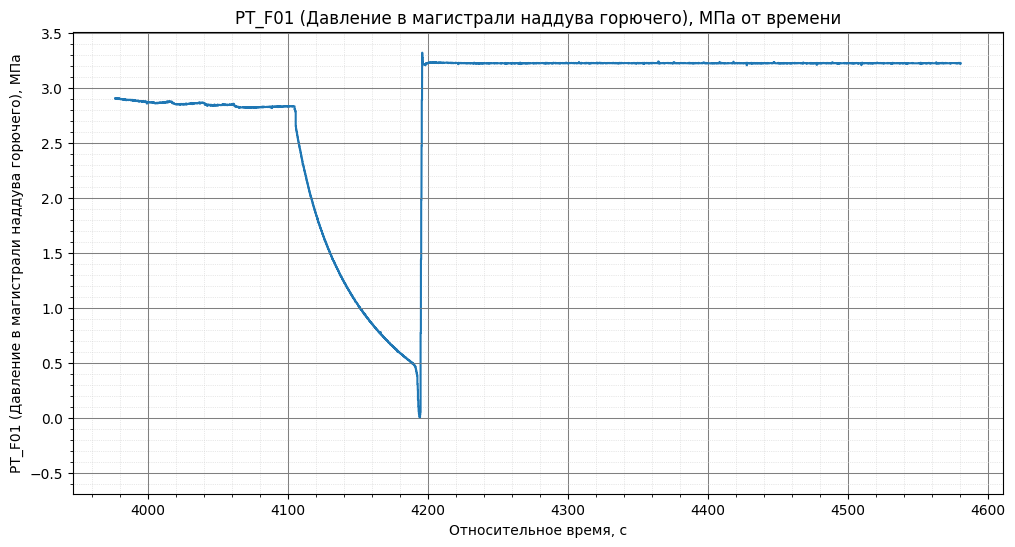

Сохранён график: ./results/fig/after_burning/after_PT_F03_(Давление_в_магистрали_.png


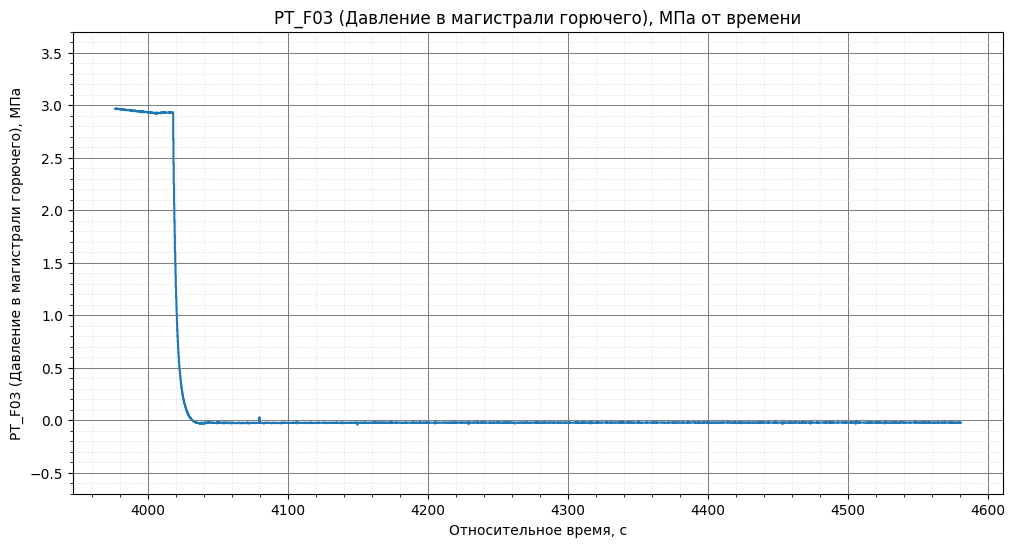

Сохранён график: ./results/fig/after_burning/after_PT_F02_(Давление_в_магистрали_.png


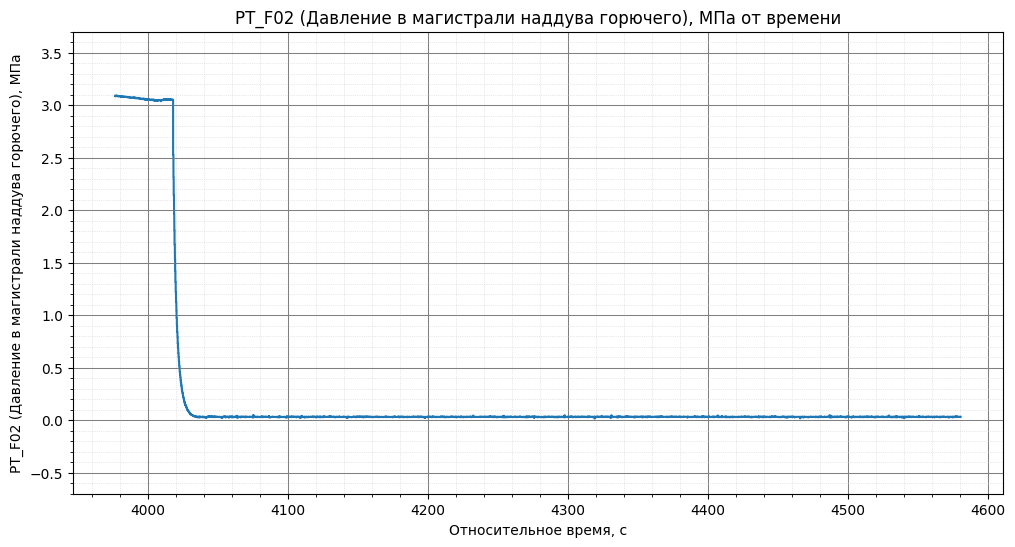

Сохранён график: ./results/fig/after_burning/after_PT_M01_(Давление_в_манифолде)_.png


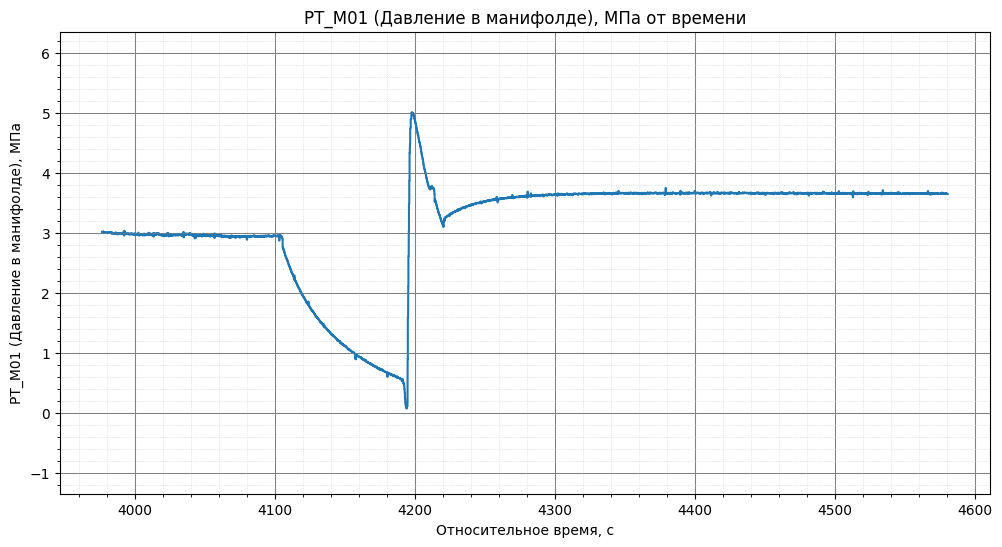

Сохранён график: ./results/fig/after_burning/after_PT_L01_(Давление_в_магистрали_.png


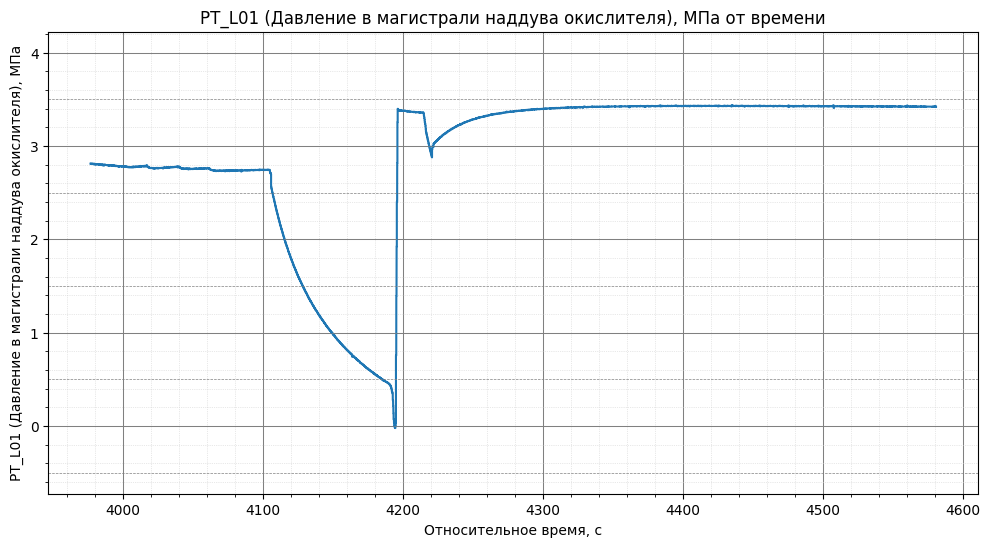

Сохранён график: ./results/fig/after_burning/after_CR-03_(Давление)_MПа.png


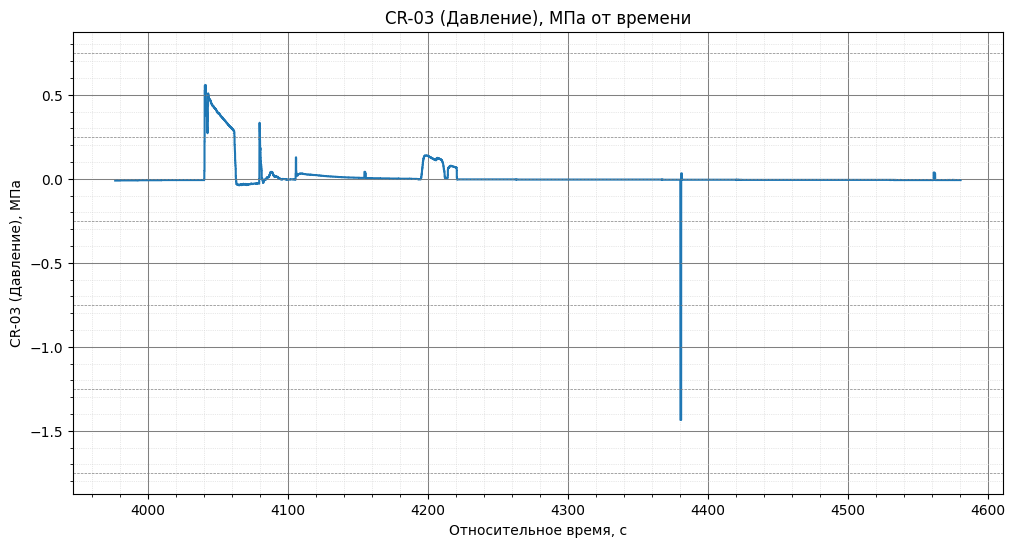

Сохранён график: ./results/fig/after_burning/after_CR-02-n_(Давление_в_магистрали.png


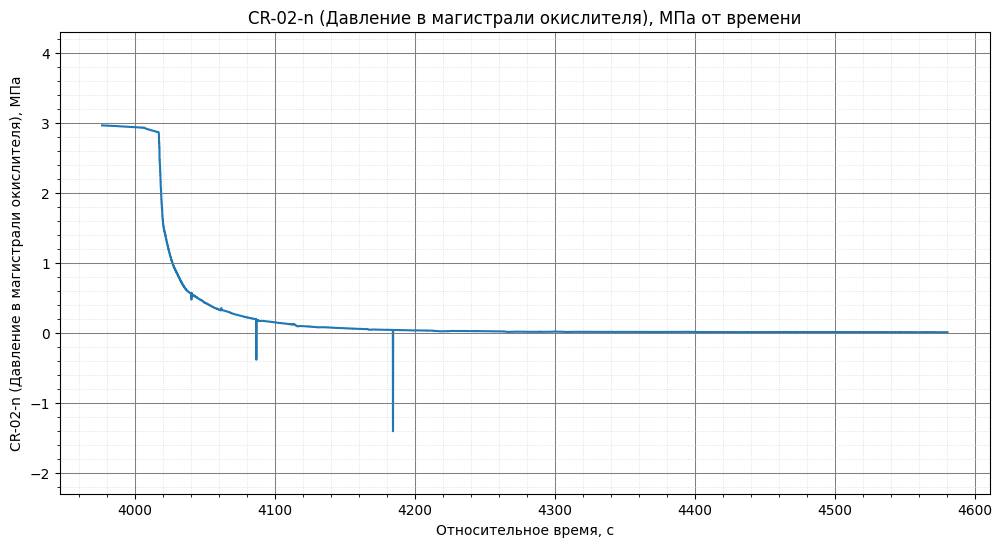

Сохранён график: ./results/fig/after_burning/after_CR-02_(Давление_в_магистрали_о.png


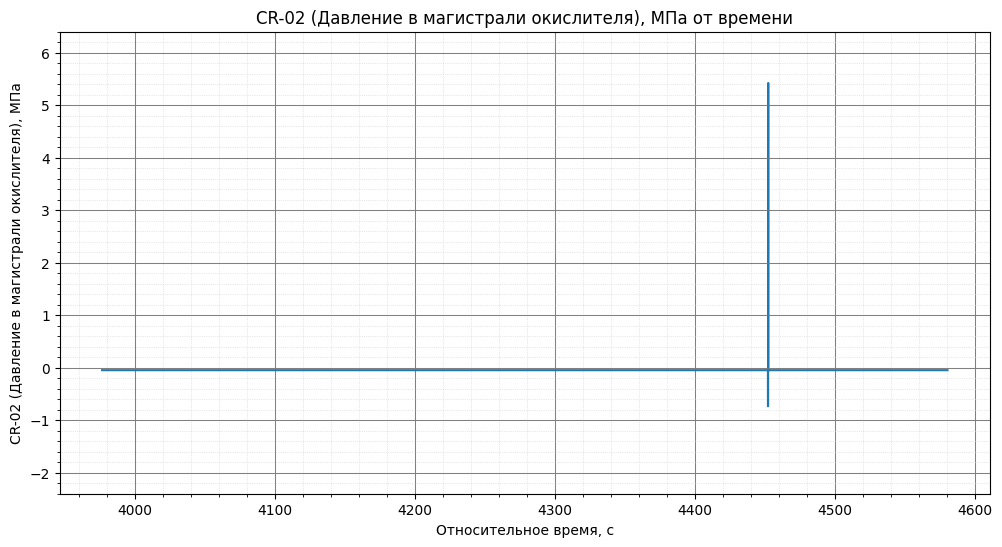

Сохранён график: ./results/fig/after_burning/after_CR-01_(Давление_в_магистрали_о.png


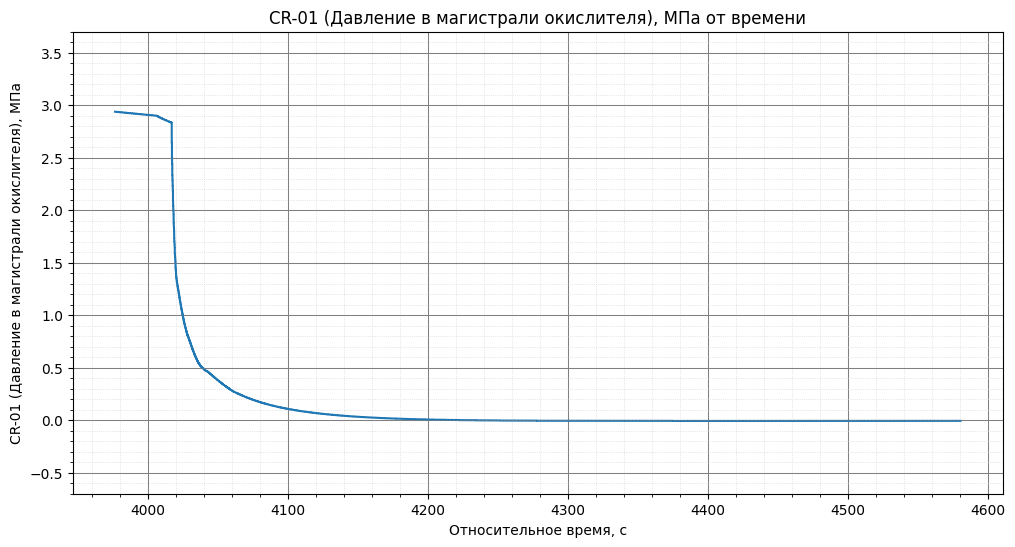

Сохранён график: ./results/fig/after_burning/after_T1_(Температура_в_баке_окислит.png


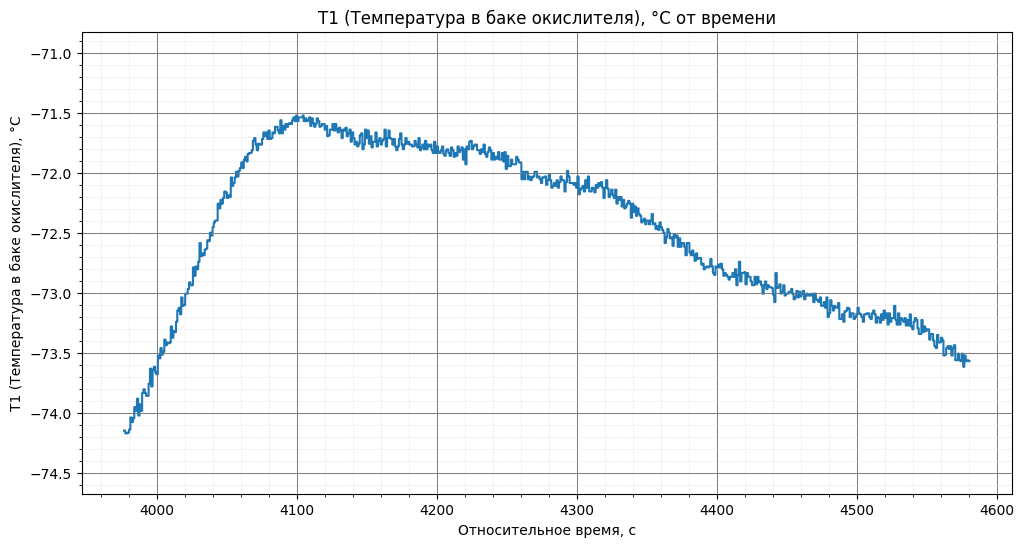

Сохранён график: ./results/fig/after_burning/after_T3_(Температура_в_баке_окислит.png


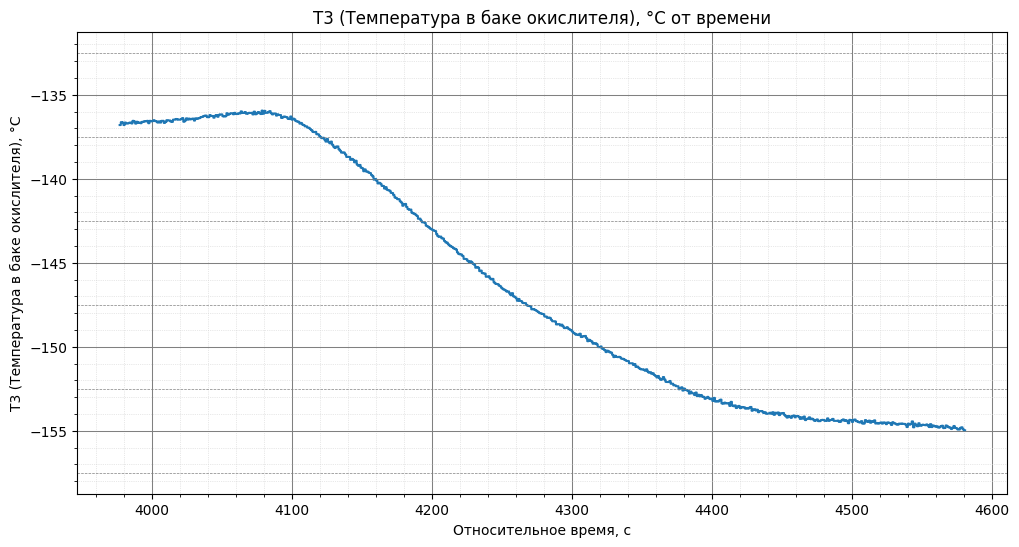

Сохранён график: ./results/fig/after_burning/after_T3_(Температура_в_баке_окислит.png


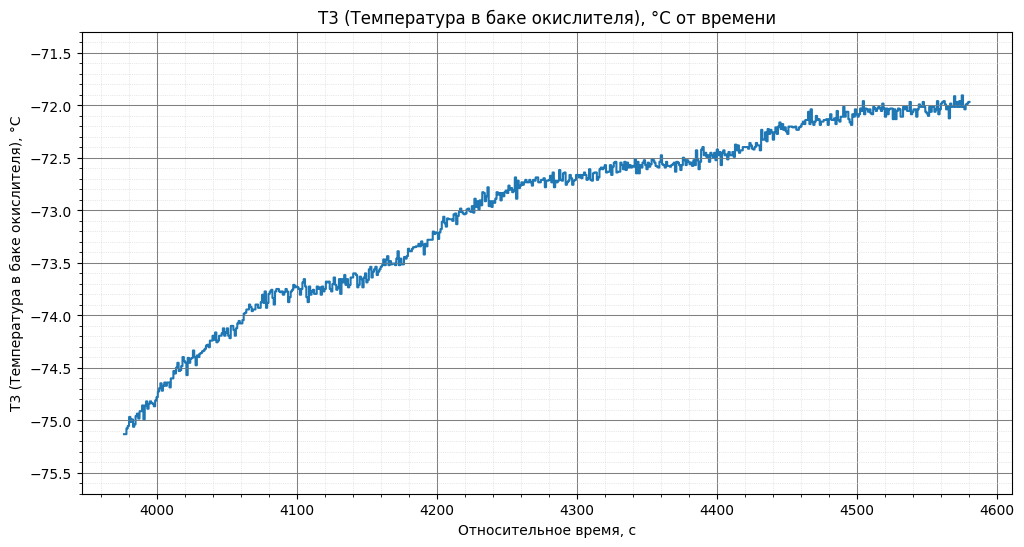

In [10]:
# Построение графиков
for column, label in column_to_show.items():
    if column != 'Timestamp' and column != 'Relative_Time':  # Пропускаем временные колонки для оси X
        plt.figure(figsize=(12, 6))

        # График: зависимость от относительного времени
        if not exp_df[column].isna().all():
            plt.plot(exp_df['Relative_Time'], exp_df[column], label=f'({column_to_show["Relative_Time"]})')

            # Настройки осей
            plt.xlabel(column_to_show['Relative_Time'])
            plt.ylabel(label)

            # Получаем текущую ось
            ax = plt.gca()

            # Настройка основной сетки
            plt.grid(which='major', axis='both', linestyle='-', linewidth=0.75, color='grey')
            plt.minorticks_on()
            plt.grid(which='minor', axis='both', linestyle=':', linewidth=0.5, color='lightgrey')

            # Добавляем горизонтальные линии на отметках основных делений по Y
            y_ticks = ax.get_yticks()  # Получает позиции основных делений на оси Y
            for y in y_ticks:
                plt.axhline(y=y, color='grey', linestyle='--', linewidth=0.5)

            # Настройки графика
            plt.title(f"{label} от времени")
           
            # Создаём безопасное название файла
            safe_label = clean_filename(label)
        
            # Сохранение графика
            file_name = os.path.join(results_folder, f"after_{safe_label}.png")  # Безопасное имя файла
            plt.savefig(file_name)
            print(f"Сохранён график: {file_name}")
            plt.show()
        else:
            print(f"Колонка {column} полностью пустая, пропускаем.")

In [11]:
# Фильтруем данные, оставляем только строки, где 'Relative_Time' > 3800, т.е. с начала прожига
filtered_df = exp_df[exp_df['Relative_Time'] > 3900]

# Словарь колонок, которые хотим визуализировать
columns_to_plot = {
    'T_1_processed (°C)': 'T_1 (Температуры камеры сгорания 1), °C',
    'T_2_processed (°C)': 'T_2 (Температуры камеры сгорания 2), °C',
    'T_3_processed (°C)': 'T_3 (Температуры камеры сгорания 3), °C',
    'TYAGA_processed (kg)': 'TYAGA (Тяга), кгс',
    'TYAGA2_processed (kg)': 'TYAGA2 (Тяга 2), кгс',
    'FT_F01_processed (rpm)': 'FT_F01 (Расход  в магистрали горючего), л/с',
    'FT_L01_processed (t)': 'FT_L01 (Расход в магистрали окислителя), л/с'
}

/tmp/ipykernel_39364/1457071575.py:31: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


Сохранён график: ./results/fig/after_burning/after_T_1_(Температуры_камеры_сгоран.png


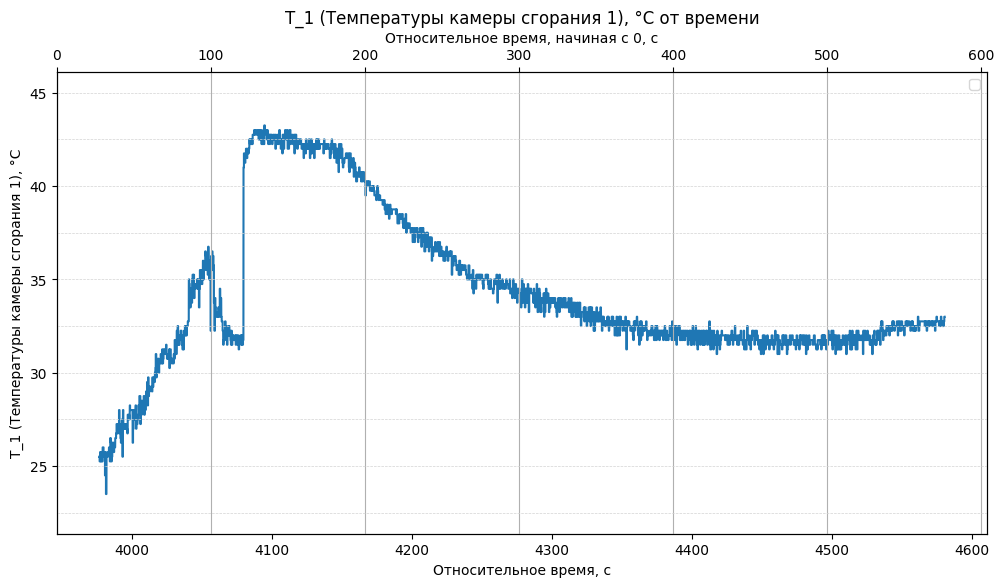

Сохранён график: ./results/fig/after_burning/after_T_2_(Температуры_камеры_сгоран.png


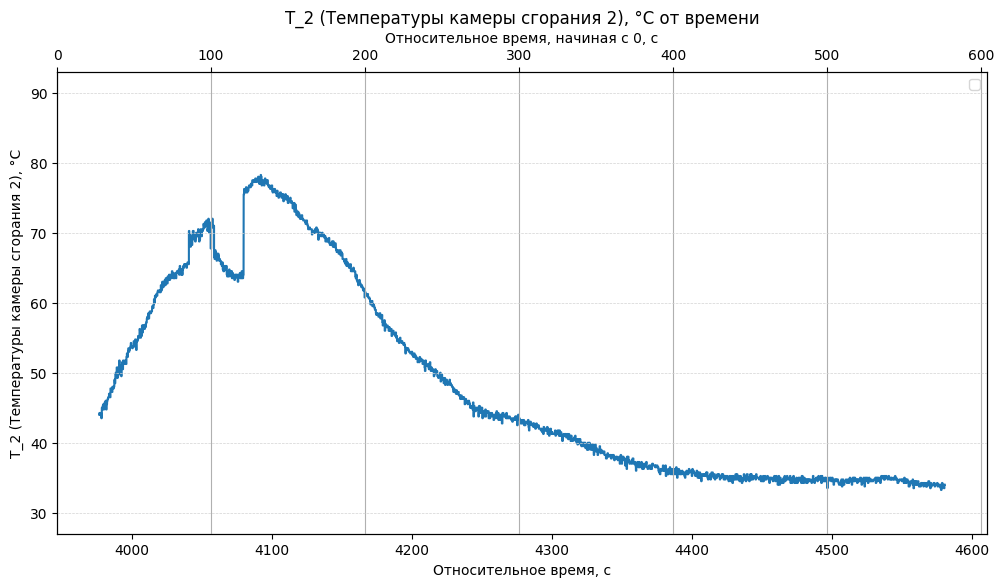

Сохранён график: ./results/fig/after_burning/after_T_3_(Температуры_камеры_сгоран.png


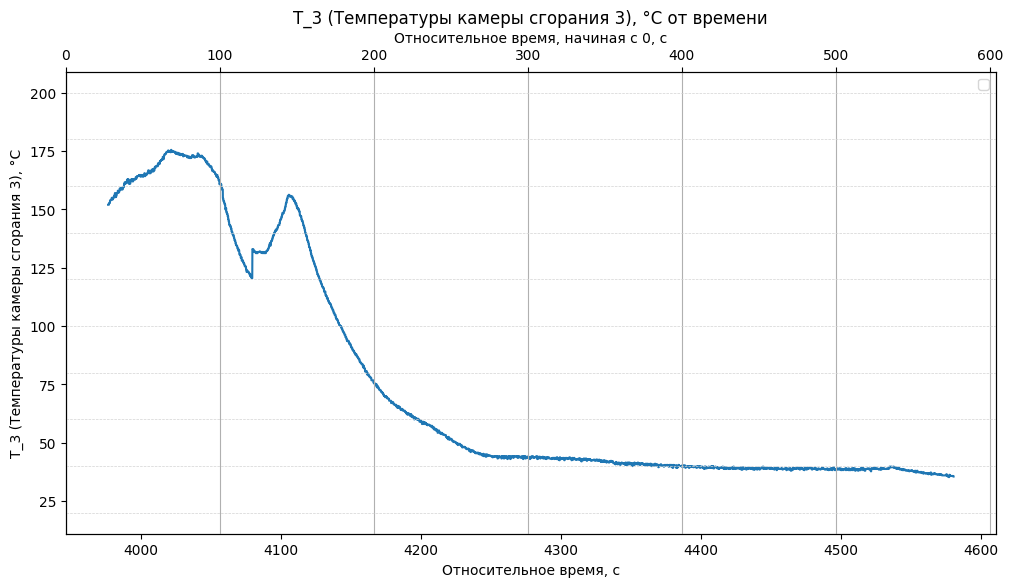

Сохранён график: ./results/fig/after_burning/after_TYAGA_(Тяга)_кгс.png


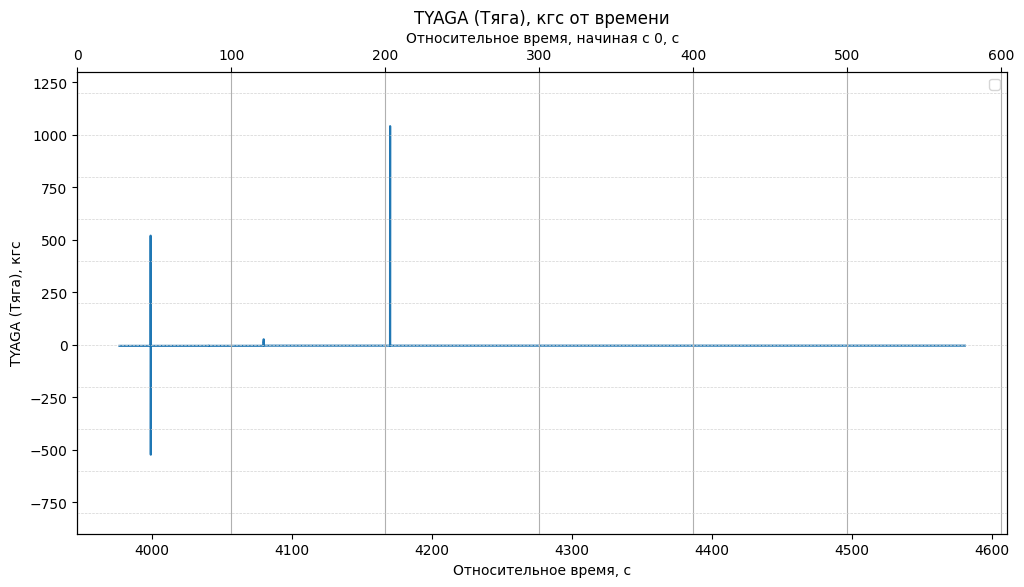

Сохранён график: ./results/fig/after_burning/after_TYAGA2_(Тяга_2)_кгс.png


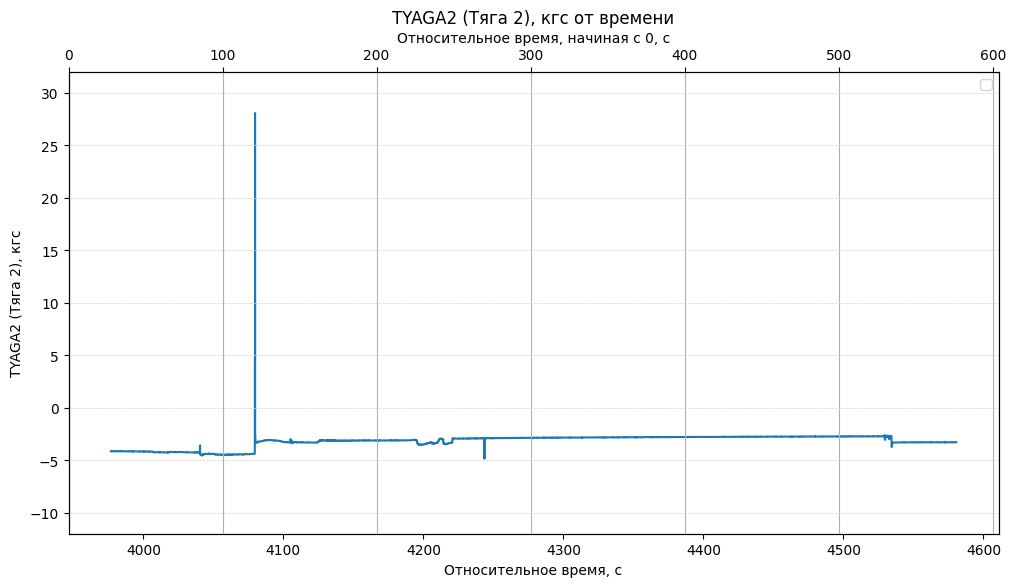

Сохранён график: ./results/fig/after_burning/after_FT_F01_(Расход_в_магистрали_го.png


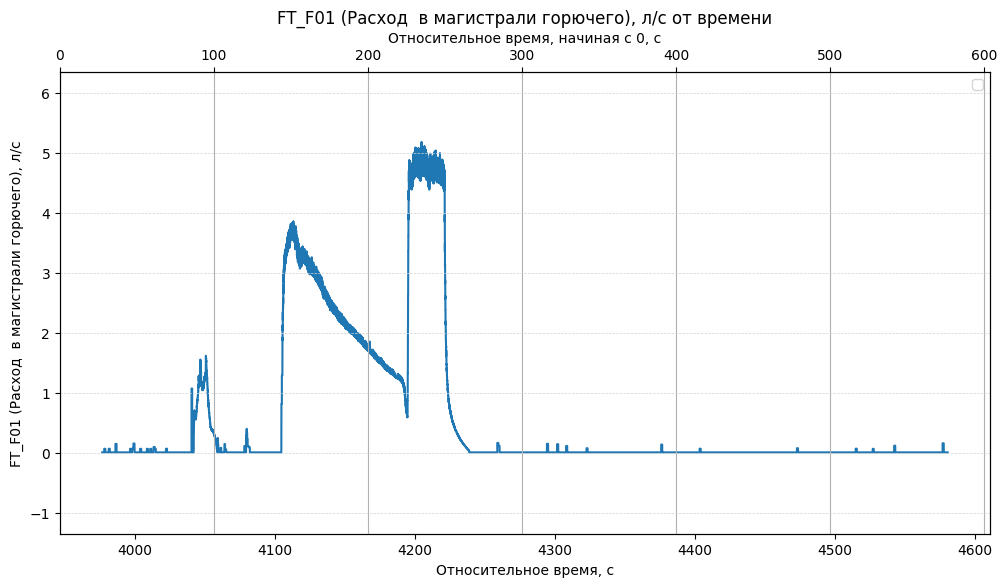

Сохранён график: ./results/fig/after_burning/after_FT_L01_(Расход_в_магистрали_ок.png


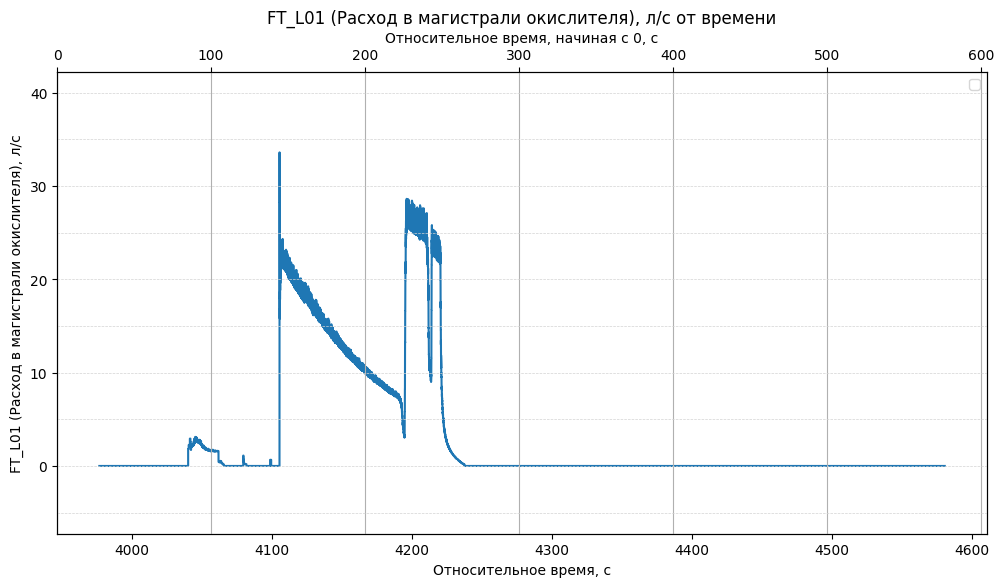

In [12]:
# Построение графиков непосредственно для прожига
for column, label in columns_to_plot.items():
    plt.figure(figsize=(12, 6))
    
    # Построение графика для отфильтрованных данных с явной меткой на этапе построения
    plt.plot(filtered_df['Relative_Time'], filtered_df[column], label=label)  
    
    plt.xlabel('Относительное время, с')  # Подпись оси X
    plt.ylabel(label)                     # Подпись оси Y
    plt.title(f"{label} от времени")     # Заголовок графика

    # -------------------------
    # Добавляем верхнюю шкалу, с временем, начинающимся от 0
    ax2 = plt.gca().twiny()  # Создаём верхнюю шкалу

    # Вычисляем новое время (относительное время с 0)
    relative_time_zeroed = filtered_df['Relative_Time'] - filtered_df['Relative_Time'].min()
    
    # Устанавливаем верхнюю шкалу
    ax2.set_xlim(0, relative_time_zeroed.max())  # Синхронизируем диапазон верхней шкалы с новым временем
    ax2.set_xlabel("Относительное время, начиная с 0, с")  # Подпись для верхней шкалы
    # -------------------------

    # Добавляем горизонтальные линии на метках оси Y
    ax = plt.gca()  # Получаем текущую ось для основной сетки
    y_ticks = ax.get_yticks()  # Получаем метки оси Y
    for y in y_ticks:
        plt.axhline(y=y, color='lightgrey', linestyle='--', linewidth=0.5)  # Рисуем горизонтальные линии

    # Добавляем легенду (уже с явными метками, если label передан)
    plt.legend()
    plt.grid()  # Всеобщая сетка

    # Создаём безопасное название файла
    safe_label = clean_filename(label)

    # Сохранение графика
    file_name = os.path.join(results_folder, f"after_{safe_label}.png")  # Безопасное имя файла
    plt.savefig(file_name)
    print(f"Сохранён график: {file_name}")
    
    # Отображение графика в Jupyter Notebook
    plt.show()